## Introduction

This analysis focuses on understanding factors that influence calories burned during physical activity. The dataset contains 15,000 records with user demographics (age, gender, height, weight), activity metrics (duration, heart rate, body temperature), and calories burned. The main goal is to explore patterns in calorie expenditure and build predictive models to estimate calories burned based on user and activity features.

In [29]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Overview

The dataset contains nine columns: User_ID, Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, and Calories. All fields are complete with no missing values. Numerical variables include age, height, weight, activity duration, heart rate, body temperature, and calories burned, while gender is categorical. The dataset is clean and ready for exploratory analysis and modeling.

In [5]:
df = pd.read_csv('calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
# Basic structure
df.info()

# Descriptive statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Exploratory Data Analysis

Descriptive Statistics <br>
Descriptive statistics provided an overview of the central tendency and spread of numerical features. For example, calories burned ranges broadly across users, highlighting variability due to factors like age, weight, and duration. These statistics give a baseline understanding of the dataset and identify typical values and potential outliers. <br><br>
Univariate Analysis<br>
We examined the distribution of each numeric variable using histograms with kernel density estimation. This helped visualize the range, skewness, and density of features such as age, duration, heart rate, and calories burned. Gender distribution was also plotted, showing the balance between male and female users. Understanding individual feature distributions is important before applying predictive modeling.<br><br>
Bivariate Analysis<br>
Scatterplots and 3D visualizations were used to study relationships between calories burned and other features like age and duration. Gender-specific analyses revealed differences in calorie expenditure between males and females. Longer activity durations and higher heart rates generally correlated with higher calories burned, as expected. These analyses help identify important predictive relationships in the data.

<AxesSubplot:title={'center':'Gender Distribution'}>

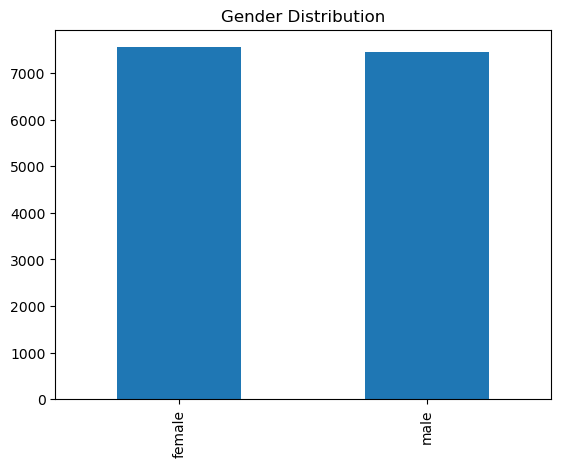

In [7]:
# Gender count
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')

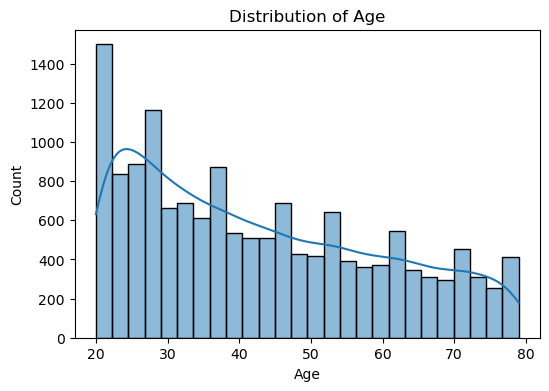

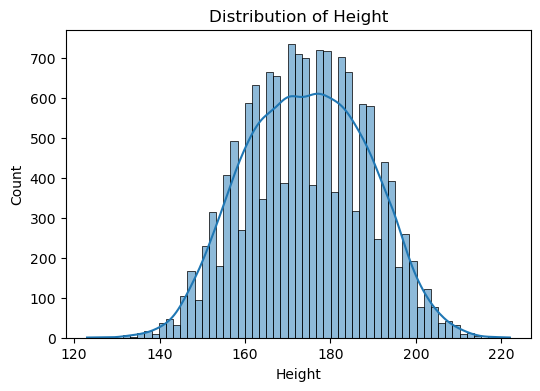

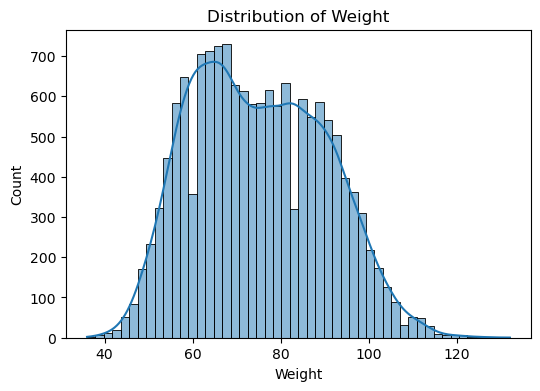

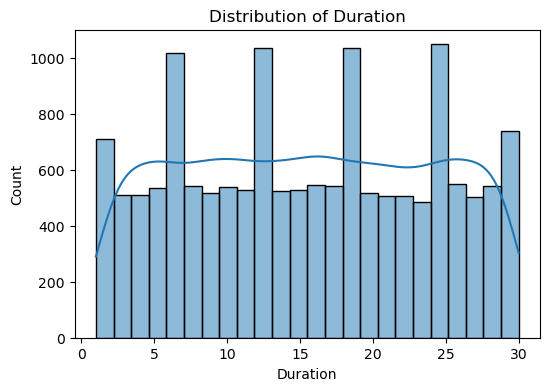

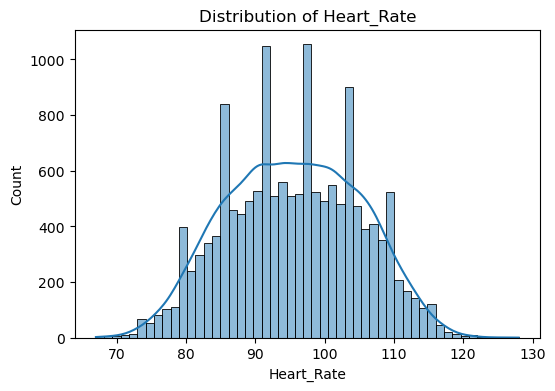

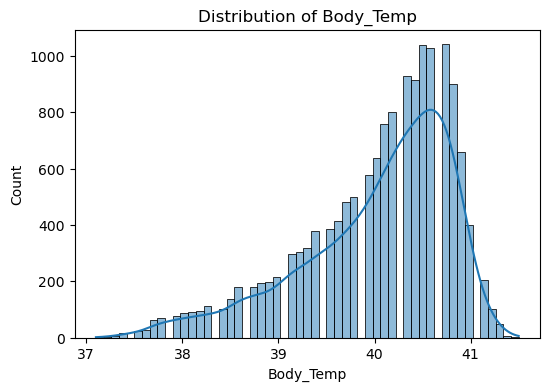

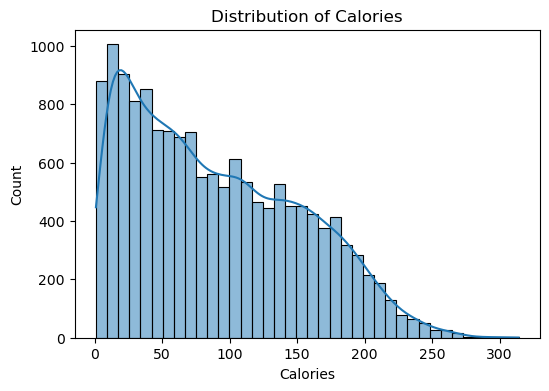

In [10]:


num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


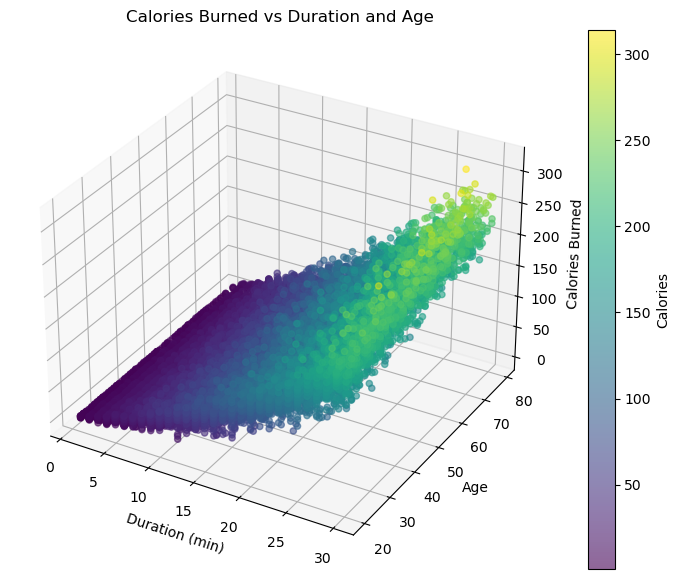

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting
scatter = ax.scatter(
    df['Duration'], df['Age'], df['Calories'],
    c=df['Calories'], cmap='viridis', alpha=0.6
)

# Labels and title
ax.set_xlabel('Duration (min)')
ax.set_ylabel('Age')
ax.set_zlabel('Calories Burned')
ax.set_title('Calories Burned vs Duration and Age')

# Add color bar
fig.colorbar(scatter, ax=ax, label='Calories')

# Show plot
plt.show()


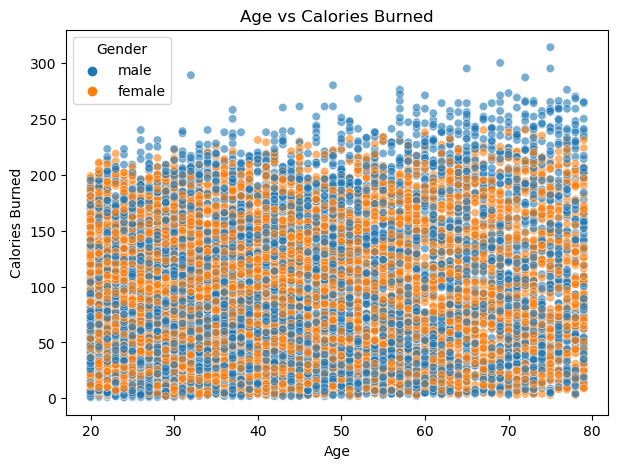

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Calories', data=df, hue='Gender', alpha=0.6)
plt.title('Age vs Calories Burned')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.show()


In [19]:
males = df[df['Gender'] == 'male']
females = df[df['Gender'] == 'female']

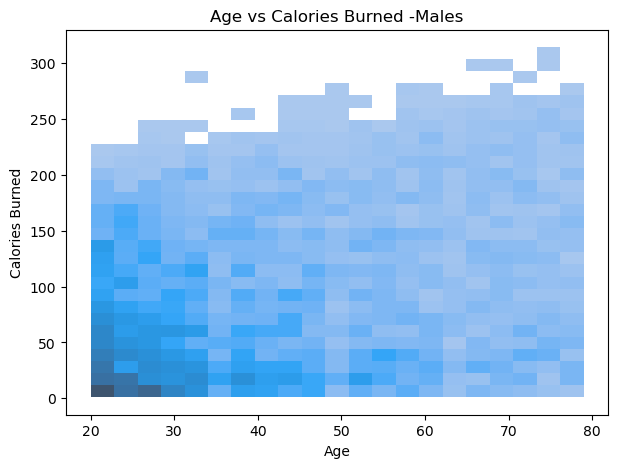

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(x='Age', y='Calories', data=males, kde=True)
plt.title('Age vs Calories Burned -Males')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()

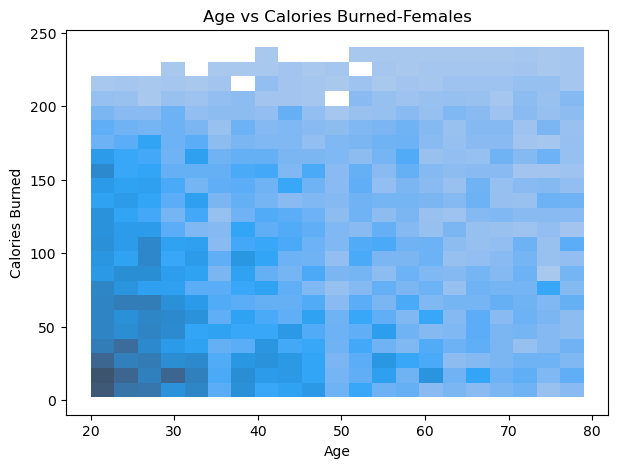

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(x='Age', y='Calories', data=females, kde=True)
plt.title('Age vs Calories Burned-Females')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()

## Predictive Modeling

The dataset was prepared for modeling by encoding the categorical Gender variable. Two models were trained: Linear Regression and Random Forest Regressor. The features included age, height, weight, duration, heart rate, and body temperature, with calories burned as the target variable. Linear Regression served as a baseline, while Random Forest captured more complex patterns.

In [30]:
# Encode categorical variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # male=1, female=0

# Define features and target
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print()

# Evaluate both models
evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest Regressor", y_test, rf_preds)


--- Linear Regression ---
MAE: 8.44
RMSE: 11.49
R² Score: 0.97

--- Random Forest Regressor ---
MAE: 1.72
RMSE: 2.68
R² Score: 1.00



The performance metrics indicate that the Random Forest Regressor significantly outperformed the Linear Regression model in predicting calories burned. The Random Forest achieved a remarkably low Mean Absolute Error (MAE) of 1.72 and a Root Mean Squared Error (RMSE) of 2.68, compared to the Linear Regression's MAE of 8.44 and RMSE of 11.49. Additionally, the R² score for the Random Forest was 1.00, suggesting it was nearly perfect in explaining the variance in the target variable, while Linear Regression still performed well with an R² of 0.97. These results show that the Random Forest was much more accurate, capturing complex patterns in the data that the linear model could not, though the perfect R² may also hint at possible overfitting.